# (Homework) Week 7 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Vaishali Kukkala \
**Email:** vk2742@nyu.edu

---

## Problem A: Bayesian Dice Game (Posterior Inference)

You are playing a dice game at a carnival. The operator has **three dice**, each with different biases for rolling a six:

| Die | P(6) | P(1–5) |
|-----|------|--------|
| A   | 0.10 | 0.90   |
| B   | 0.30 | 0.70   |
| C   | 0.60 | 0.40   |

Before each round, the operator secretly picks one die at random (each equally likely). He then rolls it **10 times** and tells you how many sixes appeared.

Your job is to infer which die was used using **Bayes’ Theorem**:

$$ P(Die|k) = \frac{P(k|Die)P(Die)}{\sum_{d} P(k|d)P(d)} $$

where $P(k|Die)$ follows a Binomial (n=10, p_i) distribution.

**Tasks:**
1. Simulate the experiment by picking a random die and rolling it 10 times.
2. Compute posterior probabilities for each die given observed sixes.
3. Plot likelihoods and posterior probabilities.
4. Evaluate inference accuracy over 100 rounds.

True die: C, Sixes observed: 5

Likelihoods P(k|Die):
A: 0.0015
B: 0.1029
C: 0.2007

Posterior probabilities P(Die|k):
A: 0.0049
B: 0.3374
C: 0.6578


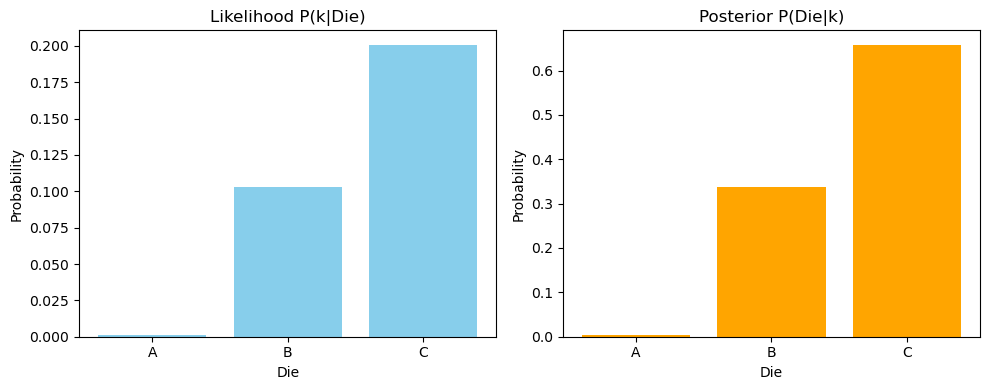


Inference accuracy over 100 rounds: 0.79


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom


dice = {'A': 0.10, 'B': 0.30, 'C': 0.60}

dice_names = list(dice.keys())
dice_probs = list(dice.values())
n_rolls = 10

np.random.seed(42)

true_die = np.random.choice(dice_names)
p_six = dice[true_die]

k_sixes = np.random.binomial(n_rolls, p_six)
print(f"True die: {true_die}, Sixes observed: {k_sixes}")

likelihoods = {die: binom.pmf(k_sixes, n_rolls, p) for die, p in dice.items()}
print("\nLikelihoods P(k|Die):")
for die, L in likelihoods.items():
    print(f"{die}: {L:.4f}")

priors = {die: 1/3 for die in dice_names}
posterior_denominator = sum(likelihoods[die] * priors[die] for die in dice_names)
posterior = {die: (likelihoods[die] * priors[die]) / posterior_denominator for die in dice_names}

print("\nPosterior probabilities P(Die|k):")
for die, post in posterior.items():
    print(f"{die}: {post:.4f}")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(likelihoods.keys(), likelihoods.values(), color='skyblue')
plt.title('Likelihood P(k|Die)')
plt.ylabel('Probability')
plt.xlabel('Die')

plt.subplot(1, 2, 2)
plt.bar(posterior.keys(), posterior.values(), color='orange')
plt.title('Posterior P(Die|k)')
plt.ylabel('Probability')
plt.xlabel('Die')

plt.tight_layout()
plt.show()

n_rounds = 100
correct = 0

for _ in range(n_rounds):
    true_die = np.random.choice(dice_names)
    p_six = dice[true_die]
    
    k_sixes = np.random.binomial(n_rolls, p_six)
    
    likelihoods = {die: binom.pmf(k_sixes, n_rolls, p) for die, p in dice.items()}
    
    posterior = {die: (likelihoods[die] * priors[die]) / sum(likelihoods[d] * priors[d] for d in dice_names)
                 for die in dice_names}
    
    predicted_die = max(posterior, key = posterior.get)
    
    if predicted_die == true_die:
        correct += 1

accuracy = correct / n_rounds
print(f"\nInference accuracy over {n_rounds} rounds: {accuracy:.2f}")

## Problem B: Linear Regression
Given x=[-2,-1,0,1,2] and y=[7,4,3,4,7]. Fit a linear model using the normal equation.

In [3]:
x = np.array([-2, -1, 0, 1, 2])
y = np.array([7, 4, 3, 4, 7])

X = np.c_[np.ones(len(x)), x]
theta = np.linalg.inv(X.T @ X) @ X.T @ y

y_pred = X @ theta

mse_linear = np.mean((y - y_pred) ** 2)

print('Linear theta:', theta, 'MSE:', mse_linear)

Linear theta: [ 5.00000000e+00 -5.55111512e-17] MSE: 2.8


## Problem C: Gradient Descent
Minimize f(w)=5(w−11)^4. Perform steps with α=1/400 and α=1/4000000. (Print the first 5 steps and visualize)

alpha = 1/400
Step 0: w = 13.000000, f(w) = 8.000000e+01
Step 1: w = 12.600000, f(w) = 3.276800e+01
Step 2: w = 12.395200, f(w) = 1.894593e+01
Step 3: w = 12.259406, f(w) = 1.257864e+01
Step 4: w = 12.159529, f(w) = 9.038498e+00

alpha = 1/4,000,000
Step 0: w = 13.000000, f(w) = 8.000000e+01
Step 1: w = 12.999960, f(w) = 7.999360e+01
Step 2: w = 12.999920, f(w) = 7.998720e+01
Step 3: w = 12.999880, f(w) = 7.998080e+01
Step 4: w = 12.999840, f(w) = 7.997441e+01


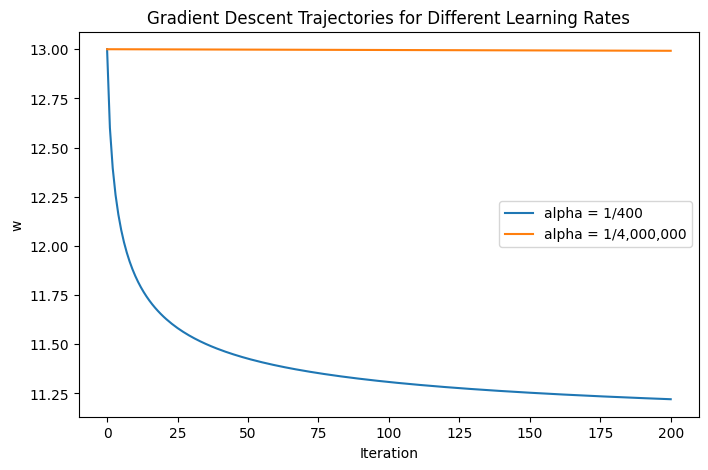

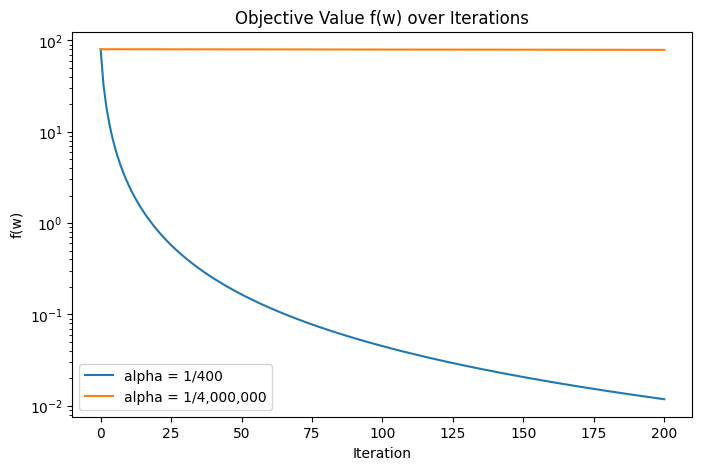

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(w):
    return 5 * (w - 11) ** 4

# Gradient Descent Function
def grad_descent_vals(w0, alpha, steps):
    ws = [w0]
    w = w0
    for _ in range(steps):
        grad = 20 * (w - 11) ** 3   # derivative of 5(w-11)^4
        w = w - alpha * grad
        ws.append(w)
    return np.array(ws)

# Run for two learning rates
hist_140 = grad_descent_vals(13, 1/400, 200)
hist_180 = grad_descent_vals(13, 1/4000000, 200)

# Print first 5 steps for each
print("alpha = 1/400")
for i in range(5):
    w = hist_140[i]
    print(f"Step {i}: w = {w:.6f}, f(w) = {f(w):.6e}")

print("\nalpha = 1/4,000,000")
for i in range(5):
    w = hist_180[i]
    print(f"Step {i}: w = {w:.6f}, f(w) = {f(w):.6e}")

# Plot w over iterations
plt.figure(figsize=(8,5))
plt.plot(hist_140, label='alpha = 1/400')
plt.plot(hist_180, label='alpha = 1/4,000,000')
plt.xlabel('Iteration')
plt.ylabel('w')
plt.title('Gradient Descent Trajectories for Different Learning Rates')
plt.legend()
plt.show()

# Plot f(w) over iterations
plt.figure(figsize=(8,5))
plt.plot([f(w) for w in hist_140], label='alpha = 1/400')
plt.plot([f(w) for w in hist_180], label='alpha = 1/4,000,000')
plt.xlabel('Iteration')
plt.ylabel('f(w)')
plt.title('Objective Value f(w) over Iterations')
plt.yscale('log')  # log scale to better see decrease
plt.legend()
plt.show()

ALL THE BEST!